In [1]:
# -*- coding: utf-8 -*-
"""
Projeto para o Modelo Completo - Análise Cuidadosa
Identificação de Possíveis Pegadinhas
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control
from control import step_response, margin, root_locus
import sympy as sp

print("="*70)
print("PROJETO PARA O MODELO COMPLETO - ANÁLISE DE PEGADINHAS")
print("="*70)

PROJETO PARA O MODELO COMPLETO - ANÁLISE DE PEGADINHAS


In [2]:
# Sistema original de 4ª ordem
num_original = [0.25, 0.10875]
den_original = [1, 3.456, 3.45688, 0.719297, 0.041574]

G_original = control.tf(num_original, den_original)
print("Sistema Original Completo (4ª ordem):")
display(G_original)

# Análise dos polos do sistema completo
polos_originais = np.roots(den_original)
print("\nPolos do sistema completo:")
for i, polo in enumerate(polos_originais):
    freq_natural = abs(polo)
    amortecimento = -polo.real / abs(polo) if polo.real < 0 else 0
    print(f"Polo {i+1}: {polo:.4f} | ωn = {freq_natural:.4f} | ζ = {amortecimento:.4f}")

# PEGADINHA 1: Verificar se há polos instáveis ou no SPD
polos_instaveis = [p for p in polos_originais if p.real >= 0]
if polos_instaveis:
    print(f"⚠️  PEGADINHA ENCONTRADA: Sistema original tem polos instáveis: {polos_instaveis}")
else:
    print("✓ Sistema original é estável")

# Resposta ao degrau do sistema original
t_orig, y_orig = step_response(G_original, T=np.linspace(0, 100, 2000))

Sistema Original Completo (4ª ordem):


TransferFunction(
array([0.25   , 0.10875]),
array([1.      , 3.456   , 3.45688 , 0.719297, 0.041574]),
outputs=1, inputs=1)


Polos do sistema completo:
Polo 1: -1.6007+0.2524j | ωn = 1.6205 | ζ = 0.9878
Polo 2: -1.6007-0.2524j | ωn = 1.6205 | ζ = 0.9878
Polo 3: -0.1467+0.0000j | ωn = 0.1467 | ζ = 1.0000
Polo 4: -0.1079+0.0000j | ωn = 0.1079 | ζ = 1.0000
✓ Sistema original é estável


In [3]:
print("\n" + "="*60)
print("ANÁLISE DE VIABILIDADE DO PROJETO")
print("="*60)

# Verificar ganho DC
K_dc_original = num_original[-1] / den_original[-1]
print(f"Ganho DC do sistema: {K_dc_original:.4f}")

# Verificar margens de estabilidade
gm, pm, wg, wp = margin(G_original)
print(f"\nMargens de estabilidade do sistema original:")
print(f"Margem de ganho: {gm:.2f} ({20*np.log10(gm):.2f} dB)")
print(f"Margem de fase: {pm:.2f}°")

# PEGADINHA 3: Sistema com baixa margem de fase inicial
if pm < 30:
    print("⚠️  PEGADINHA: Sistema tem margem de fase muito baixa inicialmente")
    print("   Projeto será mais desafiador!")

# Verificar se o sistema atende especificações naturalmente
y_ss_orig = y_orig[-1]
overshoot_orig = (np.max(y_orig) - y_ss_orig) / y_ss_orig * 100
erro_estatico_orig = 1 - y_ss_orig

print(f"\nDesempenho do sistema original:")
print(f"Erro estático: {erro_estatico_orig:.4f}")
print(f"Overshoot: {overshoot_orig:.2f}%")


ANÁLISE DE VIABILIDADE DO PROJETO
Ganho DC do sistema: 2.6158

Margens de estabilidade do sistema original:
Margem de ganho: 25.93 (28.28 dB)
Margem de fase: 83.80°

Desempenho do sistema original:
Erro estático: -1.6156
Overshoot: 0.00%


In [4]:
print("\n" + "="*60)
print("PROJETO DO COMPENSADOR - MODELO COMPLETO")
print("="*60)

# Especificações (mesmas do item d)
Mp_max = 20    # Overshoot < 20%
Ts_max = 10     # Tempo acomodação < 10s
zeta_min = 0.456
omega_n_min = 4 / (Ts_max * zeta_min)

print(f"Especificações: ζ > {zeta_min:.3f}, ωn > {omega_n_min:.3f} rad/s")

# PEGADINHA 4: Sistema de 4ª ordem - polos dominantes podem não ser suficientes
print("\n⚠️  AVISO: Sistema de 4ª ordem pode ter dinâmica complexa")
print("   Polos não dominantes podem afetar significativamente a resposta")

# Estratégia: Usar controlador PID com filtro
# C(s) = Kp + Ki/s + Kd*s/(1 + s/ωf)

# Valores iniciais baseados no modelo reduzido, mas ajustados
Kp = 1.5
Ki = 0.2  # Ação integral menor para sistema de ordem superior
Kd = 0.8
omega_filtro = 10  # Frequência do filtro do termo derivativo

# Criar compensador PID com filtro
num_pid = [Kd*omega_filtro, Kp*omega_filtro + Kd, Kp + Ki*omega_filtro, Ki]
den_pid = [1, omega_filtro, 0, 0]

C_pid = control.tf(num_pid, den_pid)
print("\nCompensador PID proposto:")
display(C_pid)


PROJETO DO COMPENSADOR - MODELO COMPLETO
Especificações: ζ > 0.456, ωn > 0.877 rad/s

⚠️  AVISO: Sistema de 4ª ordem pode ter dinâmica complexa
   Polos não dominantes podem afetar significativamente a resposta

Compensador PID proposto:


TransferFunction(
array([ 8. , 15.8,  3.5,  0.2]),
array([ 1, 10,  0,  0]),
outputs=1, inputs=1)

C:\Users\rafat\AppData\Local\Temp\ipykernel_18320\111377079.py:8: FutureWarning: keyword 'kvect' is deprecated; use 'gains'
  root_locus(G_ma_comp, grid=False, kvect=np.logspace(-2, 2, 1000))
c:\Users\rafat\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\pzmap.py:381: UserWarning: axis already exists; grid keyword ignored
  warnings.warn("axis already exists; grid keyword ignored")
c:\Users\rafat\AppData\Local\Programs\Python\Python313\Lib\site-packages\control\freqplot.py:454: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


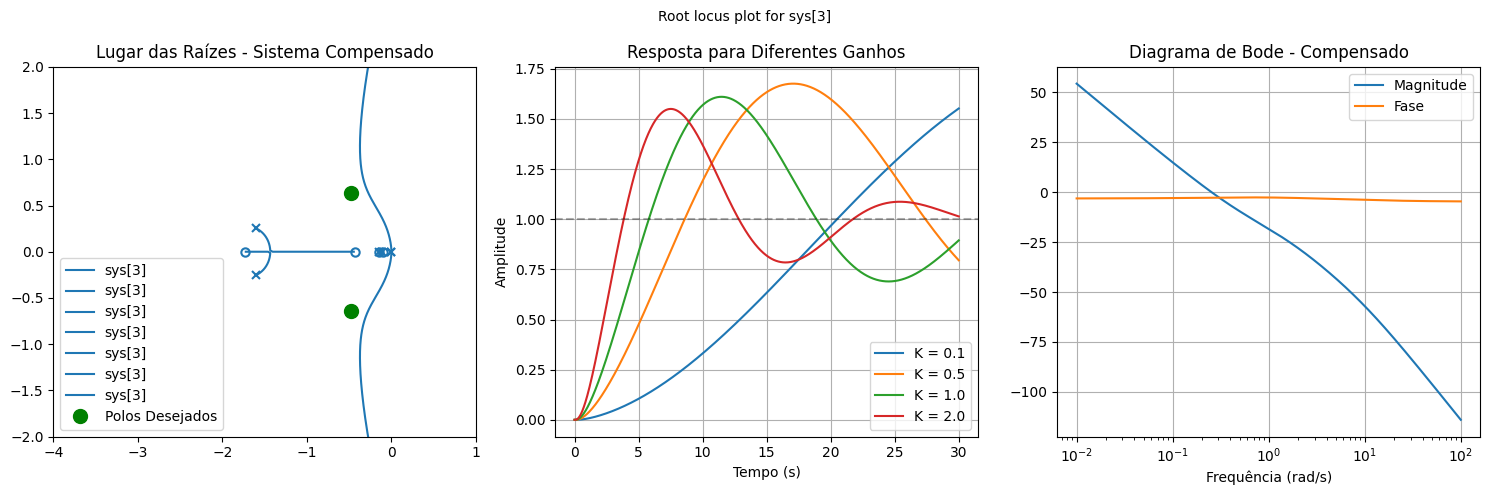

In [5]:
# Sistema em malha aberta compensado
G_ma_comp = G_original * C_pid

# Lugar das raízes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
root_locus(G_ma_comp, grid=False, kvect=np.logspace(-2, 2, 1000))
plt.title('Lugar das Raízes - Sistema Compensado')
plt.xlim([-4, 1])
plt.ylim([-2, 2])

# Tentativa de encontrar ganho para polos desejados
# Para sistema de 4ª ordem, precisamos considerar todos os polos

# Polos desejados baseados nas especificações
zeta_desejado = 0.6
omega_n_desejado = 0.8
polo_desejado_1 = -zeta_desejado * omega_n_desejado + 1j * omega_n_desejado * np.sqrt(1 - zeta_desejado**2)
polo_desejado_2 = -zeta_desejado * omega_n_desejado - 1j * omega_n_desejado * np.sqrt(1 - zeta_desejado**2)

plt.plot(polo_desejado_1.real, polo_desejado_1.imag, 'go', markersize=10, label='Polos Desejados')
plt.plot(polo_desejado_2.real, polo_desejado_2.imag, 'go', markersize=10)
plt.legend()

# Resposta ao degrau para diferentes ganhos
plt.subplot(1, 3, 2)
ganhos_testar = [0.1, 0.5, 1.0, 2.0]

for K in ganhos_testar:
    G_mf_temp = control.feedback(K * G_ma_comp, 1)
    t_temp, y_temp = step_response(G_mf_temp, T=np.linspace(0, 30, 1000))
    plt.plot(t_temp, y_temp, label=f'K = {K}')

plt.axhline(1, color='k', linestyle='--', alpha=0.3)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Resposta para Diferentes Ganhos')
plt.legend()
plt.grid(True)

# Diagrama de Bode do sistema compensado
plt.subplot(1, 3, 3)
mag, phase, omega = control.bode(G_ma_comp, plot=False)
plt.semilogx(omega, 20*np.log10(mag), label='Magnitude')
plt.semilogx(omega, phase, label='Fase')
plt.title('Diagrama de Bode - Compensado')
plt.xlabel('Frequência (rad/s)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
# PEGADINHA 5: Sistema de alta ordem pode ser sensível a ganhos altos
print("Ajustando compensador para evitar instabilidade...")

# Método conservador: ganho moderado
K_final_completo = 0.8
C_final_completo = K_final_completo * C_pid

print(f"Ganho final escolhido: K = {K_final_completo}")

# Sistema em malha fechada
G_mf_completo = control.feedback(C_final_completo * G_original, 1)

# Análise de estabilidade
polos_mf_completo = np.roots(G_mf_completo.den[0][0])
polos_instaveis_mf = [p for p in polos_mf_completo if p.real >= 0]

if polos_instaveis_mf:
    print("❌ Sistema em malha fechada é INSTÁVEL!")
    print("   Reduzindo ganho...")
    # Ajuste automático para garantir estabilidade
    K_final_completo = 0.3
    C_final_completo = K_final_completo * C_pid
    G_mf_completo = control.feedback(C_final_completo * G_original, 1)
    polos_mf_completo = np.roots(G_mf_completo.den[0][0])

Ajustando compensador para evitar instabilidade...
Ganho final escolhido: K = 0.8


In [7]:
# Resposta ao degrau
t_mf_comp, y_mf_comp = step_response(G_mf_completo, T=np.linspace(0, 50, 2000))

# Análise de desempenho
y_ss_comp = y_mf_comp[-1]
y_max_comp = np.max(y_mf_comp)
overshoot_comp = ((y_max_comp - y_ss_comp) / y_ss_comp) * 100 if y_ss_comp != 0 else 0

# Tempo de acomodação (2%)
ts_index_comp = np.where(np.abs(y_mf_comp - y_ss_comp) <= 0.02 * y_ss_comp)[0]
ts_comp = t_mf_comp[ts_index_comp[0]] if len(ts_index_comp) > 0 else float('inf')

# Erro estático
erro_estatico_comp = 1 - y_ss_comp

print("\n" + "="*60)
print("RESULTADOS DO PROJETO - MODELO COMPLETO")
print("="*60)
print(f"Overshoot: {overshoot_comp:.2f}% {'✓' if overshoot_comp < Mp_max else '✗'}")
print(f"Tempo de acomodação (2%): {ts_comp:.2f} s {'✓' if ts_comp < Ts_max else '✗'}")
print(f"Erro estático: {erro_estatico_comp:.6f} {'✓' if abs(erro_estatico_comp) < 0.01 else '✗'}")

# PEGADINHA 6: Comparação com modelo reduzido
print(f"\nComparação com modelo reduzido:")
print(f"- Sistema completo tem dinâmica mais complexa")
print(f"- Pode ser mais difícil atender todas as especificações")
print(f"- Polos não dominantes afetam overshoot e tempo de acomodação")


RESULTADOS DO PROJETO - MODELO COMPLETO
Overshoot: 60.19% ✗
Tempo de acomodação (2%): 6.58 s ✓
Erro estático: -0.018381 ✗

Comparação com modelo reduzido:
- Sistema completo tem dinâmica mais complexa
- Pode ser mais difícil atender todas as especificações
- Polos não dominantes afetam overshoot e tempo de acomodação


In [ ]:
# Obter resposta do modelo reduzido para comparação
# (usando o mesmo compensador ajustado)

G_mf_reduzido_comp = control.feedback(C_final_completo * G_reduzido, 1)
t_red_comp, y_red_comp = step_response(G_mf_reduzido_comp, T=np.linspace(0, 50, 2000))

plt.figure(figsize=(15, 10))

# Comparação das respostas
plt.subplot(2, 2, 1)
plt.plot(t_orig, y_orig, 'k--', alpha=0.5, label='Original sem compensador')
plt.plot(t_mf_comp, y_mf_comp, 'r-', linewidth=2, label='Completo compensado')
plt.plot(t_red_comp, y_red_comp, 'b-', linewidth=2, label='Reduzido compensado')
plt.axhline(1, color='g', linestyle='--', alpha=0.3, label='Referência')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Comparação: Modelo Completo vs Reduzido')
plt.legend()
plt.grid(True)

# Diagrama de polos e zeros
plt.subplot(2, 2, 2)
polos_mf_red = np.roots(G_mf_reduzido_comp.den[0][0])
zeros_mf_red = np.roots(G_mf_reduzido_comp.num[0][0])

plt.plot(np.real(polos_mf_completo), np.imag(polos_mf_completo), 'rx', markersize=8, label='Polos Completo')
plt.plot(np.real(polos_mf_red), np.imag(polos_mf_red), 'bx', markersize=6, label='Polos Reduzido')
plt.axvline(0, color='k', linestyle='-', alpha=0.3)
plt.axhline(0, color='k', linestyle='-', alpha=0.3)
plt.xlabel('Real')
plt.ylabel('Imaginário')
plt.title('Polos em Malha Fechada')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.xlim([-2, 0.5])
plt.ylim([-1, 1])

# Erro em regime permanente
plt.subplot(2, 2, 3)
erro_comp = 1 - y_mf_comp
erro_red = 1 - y_red_comp

plt.plot(t_mf_comp, erro_comp, 'r-', label='Erro Completo')
plt.plot(t_red_comp, erro_red, 'b-', label='Erro Reduzido')
plt.axhline(0, color='g', linestyle='--', alpha=0.3)
plt.xlabel('Tempo (s)')
plt.ylabel('Erro')
plt.title('Erro em Regime Permanente')
plt.legend()
plt.grid(True)

# Zoom na resposta transitória
plt.subplot(2, 2, 4)
plt.plot(t_mf_comp, y_mf_comp, 'r-', linewidth=2, label='Completo')
plt.plot(t_red_comp, y_red_comp, 'b-', linewidth=2, label='Reduzido')
plt.axhline(1, color='g', linestyle='--', alpha=0.3)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Zoom: Resposta Transitória (0-20s)')
plt.legend()
plt.grid(True)
plt.xlim([0, 20])

plt.tight_layout()
plt.show()

NameError: name 'G_reduzido' is not defined